In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('data/cars_en.csv')
df.shape

(6675, 23)

In [2]:
df.head()

,ListingTitle,District,City,Price(TRY),ListingID,ListingDate,Brand,Series,Model,Year,...,BodyType,Color,EngineSize(cc),EnginePower(HP),DriveTrain,PaintAndPartsCondition,TradeInAvailable,SellerType,VehicleTax(TRY),AccidentHistory
0,2016 AUDİ A3 SPORTBACK 1.0 TFSI BOYASIZ/DEĞİŞE...,Aşağısoku Mh. Merkez,Bolu,1.169.000 TL,27812680,07 April 2025,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,2016.0,...,Hatchback/5,White,1200 cm3' e kadar,101 - 125 HP,FWD,Original Right Rear Fender Trunk Lid Left R...,Trade-In Accepted,NaN,NaN,NaN
1,2018 AUDİ A6 2.0 TDI QUATTRO SUNROOF MATRİX VA...,Güneşevler Mh. Altındağ,Ankara,2.450.000 TL,28816234,07 April 2025,Audi,A6,A6 Sedan 2.0 TDI Quattro,2018.0,...,Sedan,Black,1968 cc,190 hp,AWD,Original Trunk Lid Right Rear Door Right Fr...,Trade-In Not Accepted,Dealer,NaN,Amount not specified
2,Sahibinden Audi A4 Sedan 1.8 TFSI 2011 Model,Burmalı Mh. Merkez,Afyonkarahisar,750.000 TL,28781662,08 April 2025,Audi,A4,A4 Sedan 1.8 TFSI,2011.0,...,Sedan,White,1798 cc,160 hp,FWD,Original Roof Left Front Door Hood Front B...,Trade-In Not Accepted,Private Seller,2.013,75.000
3,2016 AUDI A3 AMBİENTE *CAM TAVAN LED XENON HIZ...,Ilıca Mh. Manavgat,Antalya,1.195.000 TL,28731117,03 April 2025,Audi,A3,A3 Sportback 1.6 TDI Ambiente,2016.0,...,Hatchback/5,Black,1598 cc,110 hp,FWD,Original Right Rear Fender Trunk Lid Right ...,Trade-In Accepted,Dealer,1.606,No tram amount
4,Sahibinden Audi A3 Sportback 1.6 TDI S-Line 20...,Uğur Mumcu Mh. Yenimahalle,Ankara,822.000 TL,28393351,02 April 2025,Audi,A3,A3 Sportback 1.6 TDI Attraction,2012.0,...,Hatchback/5,White,1598 cc,105 hp,FWD,Original Right Rear Fender Trunk Lid Left R...,NaN,NaN,NaN,Amount not specified


In [3]:
df.tail()

,ListingTitle,District,City,Price(TRY),ListingID,ListingDate,Brand,Series,Model,Year,...,BodyType,Color,EngineSize(cc),EnginePower(HP),DriveTrain,PaintAndPartsCondition,TradeInAvailable,SellerType,VehicleTax(TRY),AccidentHistory
6670,Sahibinden Opel Corsa 1.3 CDTI Enjoy 111 2010 ...,Karapürçek Mh. Altındağ,Ankara,450.000 TL,29019564,16 April 2025,Opel,Corsa,1.3 CDTI Enjoy 111,2010.0,...,Hatchback/5,NaN,1248 cc,90 hp,FWD,Original Right Rear Fender Trunk Lid Left R...,NaN,Private Seller,NaN,No tram amount
6671,ÇORUM MERKEZ 1999 HONDA CİVİC 1.4is TAVAN BOYASIZ,Ak Kent Mh. Merkez,Çorum,355.000 TL,29019753,16 April 2025,Honda,Civic,1.4 i S,1999.0,...,Sedan,NaN,1396 cc,90 hp,FWD,Original Roof Locally Painted - Painted R...,Trade-In Accepted,NaN,Yıllık MTV 436 TL,No tram amount
6672,Sahibinden Peugeot 206 1.4 X-Design 2005 Model,Cumhuriyet Mh. Lüleburgaz,Kırklareli,375.000 TL,29018858,16 April 2025,Peugeot,206,1.4 X-Design,2005.0,...,Hatchback/3,NaN,1360 cc,76 hp,FWD,Original - Locally Painted - Painted Righ...,NaN,Private Seller,NaN,Tramer 3.000 TL
6673,Sahibinden Peugeot 206 1.6 XT 2001 Model,Batıkent Mh. Şehitkamil,Gaziantep,220.000 TL,29019438,16 April 2025,Peugeot,206,1.6 XT,2001.0,...,Hatchback/5,NaN,1587 cc,109 hp,FWD,Original Right Rear Fender Trunk Lid Left R...,NaN,Private Seller,NaN,NaN
6674,Galeriden Renault Megane 1.5 dCi Touch Plus 20...,Yukarı Dudullu Mh. Ümraniye,İstanbul,770.000 TL,29022036,16 April 2025,Renault,Megane,1.5 dCi Touch Plus,2017.0,...,Sedan,NaN,1461 cc,110 hp,FWD,Original - Locally Painted - Painted - R...,Trade-In Accepted,Dealer,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6675 entries, 0 to 6674
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ListingTitle            6675 non-null   object 
 1   District                6675 non-null   object 
 2   City                    6675 non-null   object 
 3   Price(TRY)              6675 non-null   object 
 4   ListingID               6675 non-null   int64  
 5   ListingDate             6675 non-null   object 
 6   Brand                   6675 non-null   object 
 7   Series                  6675 non-null   object 
 8   Model                   6674 non-null   object 
 9   Year                    6674 non-null   float64
 10  Mileage(km)             6675 non-null   object 
 11  TransmissionType        6674 non-null   object 
 12  FuelType                6674 non-null   object 
 13  BodyType                6556 non-null   object 
 14  Color                   4220 non-null   

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].nunique()

ListingTitle              5412
District                  3170
City                        81
Price(TRY)                1376
ListingDate                 62
Brand                       39
Series                     214
Model                     1369
Mileage(km)               1302
TransmissionType             3
FuelType                     5
BodyType                     9
Color                       23
EngineSize(cc)             153
EnginePower(HP)            163
DriveTrain                   3
PaintAndPartsCondition    2731
TradeInAvailable             2
SellerType                   4
VehicleTax(TRY)             49
AccidentHistory            601
dtype: int64

In [6]:
df.isna().sum()

ListingTitle                 0
District                     0
City                         0
Price(TRY)                   0
ListingID                    0
ListingDate                  0
Brand                        0
Series                       0
Model                        1
Year                         1
Mileage(km)                  0
TransmissionType             1
FuelType                     1
BodyType                   119
Color                     2455
EngineSize(cc)             191
EnginePower(HP)            198
DriveTrain                 237
PaintAndPartsCondition       0
TradeInAvailable          3797
SellerType                3098
VehicleTax(TRY)           4714
AccidentHistory           3584
dtype: int64

## Target Selection + Cleaning
### Brand

In [7]:
# Defining target variable
## Target Selection + Cleaning
target = 'Brand'
predictors = [col for col in df.columns if col != target]

print(f"Number of predictors: {len(predictors)}")
print(f"Predictors: {predictors}")

Number of predictors: 22
Predictors: ['ListingTitle', 'District', 'City', 'Price(TRY)', 'ListingID', 'ListingDate', 'Series', 'Model', 'Year', 'Mileage(km)', 'TransmissionType', 'FuelType', 'BodyType', 'Color', 'EngineSize(cc)', 'EnginePower(HP)', 'DriveTrain', 'PaintAndPartsCondition', 'TradeInAvailable', 'SellerType', 'VehicleTax(TRY)', 'AccidentHistory']


Total unique brands: 39
Top 10 brands:
Brand
Renault       1077
Volkswagen     809
Fiat           712
Opel           673
BMW            557
Peugeot        537
Toyota         536
Ford           528
Audi           495
Hyundai        494
Name: count, dtype: int64


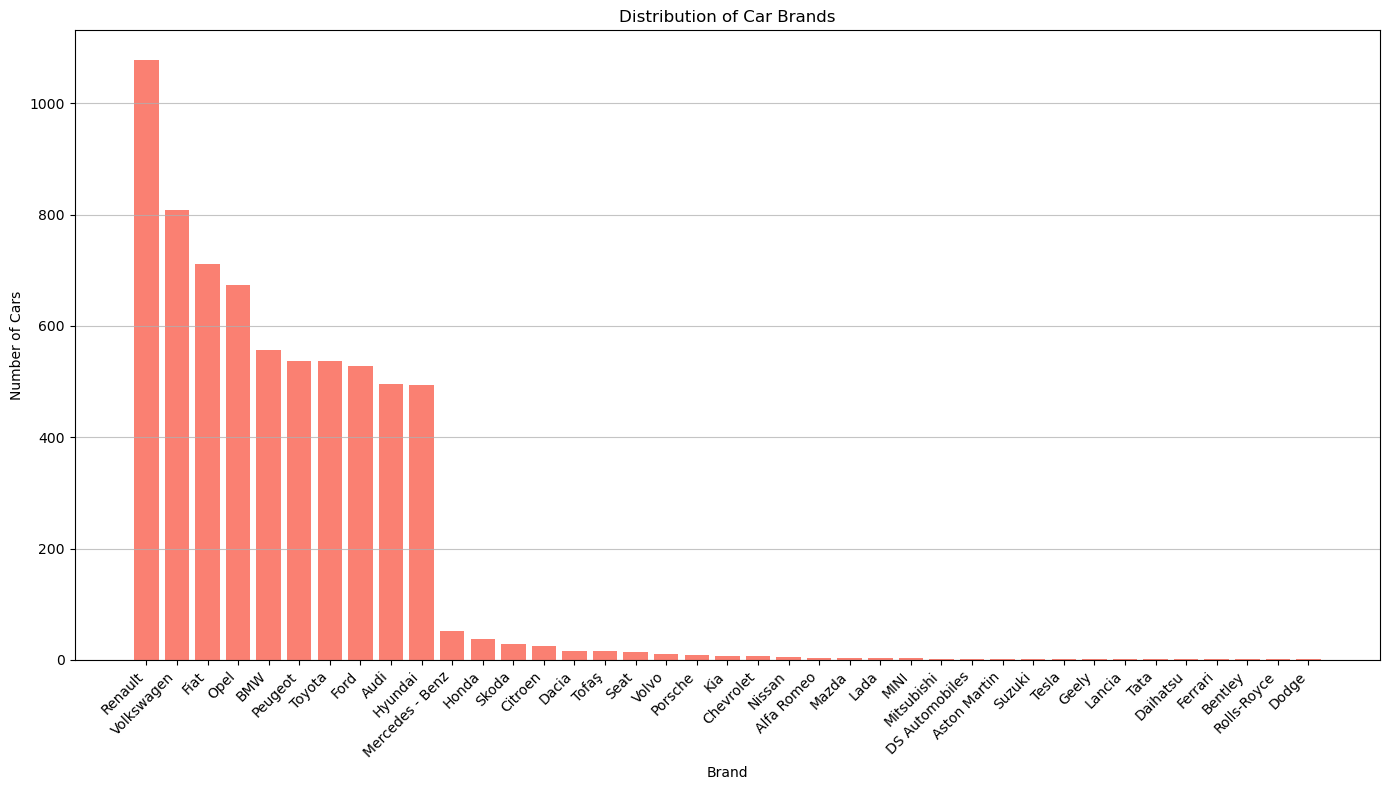

In [8]:
brand_counts = df['Brand'].value_counts()

# Target variable bar plot
plt.figure(figsize=(14, 8))
plt.bar(brand_counts.index, brand_counts.values, color='salmon')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)

print(f"Total unique brands: {brand_counts.shape[0]}")
print(f"Top 10 brands:\n{brand_counts.head(10)}")

In [9]:
top_10_brands = brand_counts.head(10).index.tolist()

df_filtered = df[df['Brand'].isin(top_10_brands)]

print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Percentage of data retained: {df_filtered.shape[0] / df.shape[0] * 100:.2f}%")

df = df_filtered.reset_index(drop=True)

Original dataset shape: (6675, 23)
Filtered dataset shape: (6418, 23)
Percentage of data retained: 96.15%


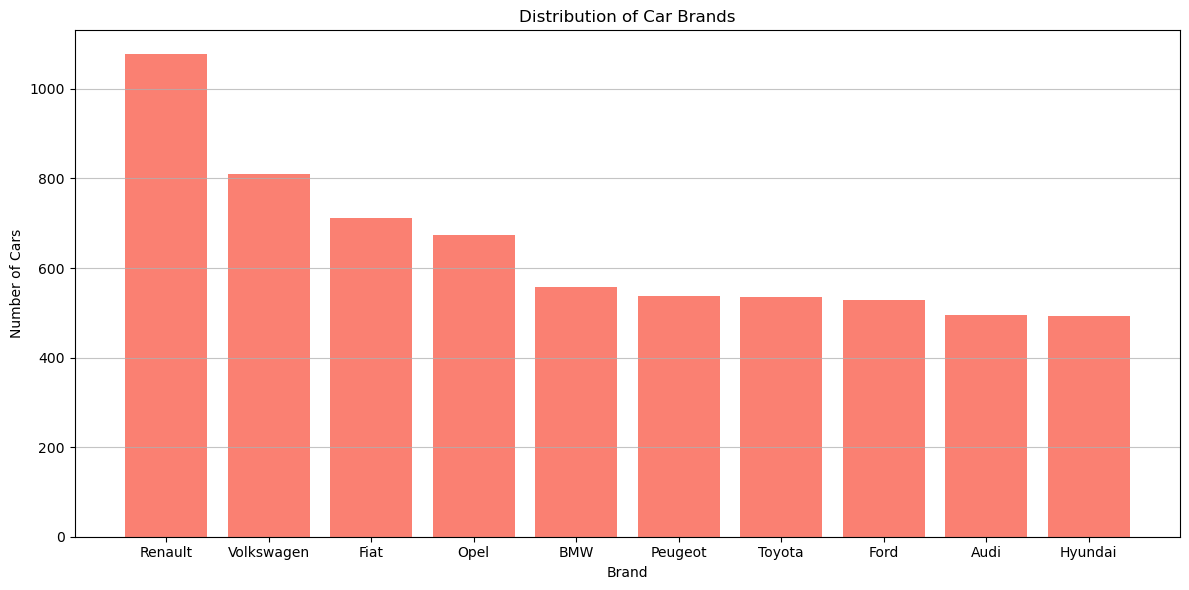

In [10]:
brand_counts = df['Brand'].value_counts()

# Visualizing the filtered target variable
plt.figure(figsize=(12, 6))
plt.bar(brand_counts.index, brand_counts.values, color='salmon')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Brands')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)

## Predictor Selection + Feature Cleaning

In [ ]:
df = df.drop(
    columns=[
        "ListingTitle", "District", "ListingID", 
        "Color", "PaintAndPartsCondition", "TradeInAvailable", 
        "SellerType", "VehicleTax(TRY)", "AccidentHistory"
        ]
    )

In [11]:
df.isna().sum()

ListingTitle                 0
District                     0
City                         0
Price(TRY)                   0
ListingID                    0
ListingDate                  0
Brand                        0
Series                       0
Model                        0
Year                         1
Mileage(km)                  0
TransmissionType             1
FuelType                     1
BodyType                    89
Color                     2315
EngineSize(cc)             177
EnginePower(HP)            192
DriveTrain                 230
PaintAndPartsCondition       0
TradeInAvailable          3609
SellerType                2956
VehicleTax(TRY)           4552
AccidentHistory           3439
dtype: int64

In [12]:
# Data cleaning 
df['Price(TRY)'] = df['Price(TRY)'].str.replace('TL', '', regex=False)  
df['Price(TRY)'] = df['Price(TRY)'].str.replace('.', '', regex=False)   
df['Price(TRY)'] = df['Price(TRY)'].str.strip()                         
df['Price(TRY)'] = df['Price(TRY)'].astype(int) 

df = df[df['Mileage(km)'].str.replace('.', '', regex=False)
                   .str.replace('km', '', regex=False)
                   .str.strip()
                   .str.isnumeric()]

df['Mileage(km)'] = df['Mileage(km)'].str.replace('km', '', regex=False)
df['Mileage(km)'] = df['Mileage(km)'].str.replace('.', '', regex=False)
df['Mileage(km)'] = df['Mileage(km)'].str.strip()
df['Mileage(km)'] = df['Mileage(km)'].astype(int)

df['EngineSize(cc)'] = df['EngineSize(cc)'].str.extract(r'(\d+)')   
df['EngineSize(cc)'] = pd.to_numeric(df['EngineSize(cc)'], errors='coerce')  
df['EngineSize(cc)'] = df['EngineSize(cc)'].astype('Int64')  

df['EnginePower(HP)'] = df['EnginePower(HP)'].str.extract(r'(\d+)')   
df['EnginePower(HP)'] = pd.to_numeric(df['EnginePower(HP)'], errors='coerce')  
df['EnginePower(HP)'] = df['EnginePower(HP)'].astype('Int64') 

df['ListingDate'] = pd.to_datetime(df['ListingDate'], format='%d %B %Y')
df['ListingYear'] = df['ListingDate'].dt.year
df['ListingMonth'] = df['ListingDate'].dt.month
df['ListingDay'] = df['ListingDate'].dt.day
df = df.drop('ListingDate', axis=1)

df['Year'] = df['Year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6417 entries, 0 to 6417
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ListingTitle            6417 non-null   object
 1   District                6417 non-null   object
 2   City                    6417 non-null   object
 3   Price(TRY)              6417 non-null   int64 
 4   ListingID               6417 non-null   int64 
 5   Brand                   6417 non-null   object
 6   Series                  6417 non-null   object
 7   Model                   6417 non-null   object
 8   Year                    6417 non-null   int64 
 9   Mileage(km)             6417 non-null   int64 
 10  TransmissionType        6417 non-null   object
 11  FuelType                6416 non-null   object
 12  BodyType                6328 non-null   object
 13  Color                   4102 non-null   object
 14  EngineSize(cc)          6241 non-null   Int64 
 15  EnginePow

In [13]:
# Label Encoding for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()
df.isna().sum()

ListingTitle                0
District                    0
City                        0
Price(TRY)                  0
ListingID                   0
Brand                       0
Series                      0
Model                       0
Year                        0
Mileage(km)                 0
TransmissionType            0
FuelType                    0
BodyType                    0
Color                       0
EngineSize(cc)            176
EnginePower(HP)           192
DriveTrain                  0
PaintAndPartsCondition      0
TradeInAvailable            0
SellerType                  0
VehicleTax(TRY)             0
AccidentHistory             0
ListingYear                 0
ListingMonth                0
ListingDay                  0
dtype: int64

In [14]:
df.to_csv('data/cars_cleaned.csv', index=False)

## Protyped Model
### Random Forest

In [15]:
from sklearn.impute import KNNImputer
imputing_cols = ['EngineSize(cc)', 'EnginePower(HP)']
imputed_array = KNNImputer(n_neighbors=5).fit_transform(df[imputing_cols])
imputed_pd = pd.DataFrame(imputed_array, columns=imputing_cols)

df[imputing_cols] = imputed_pd[imputing_cols]

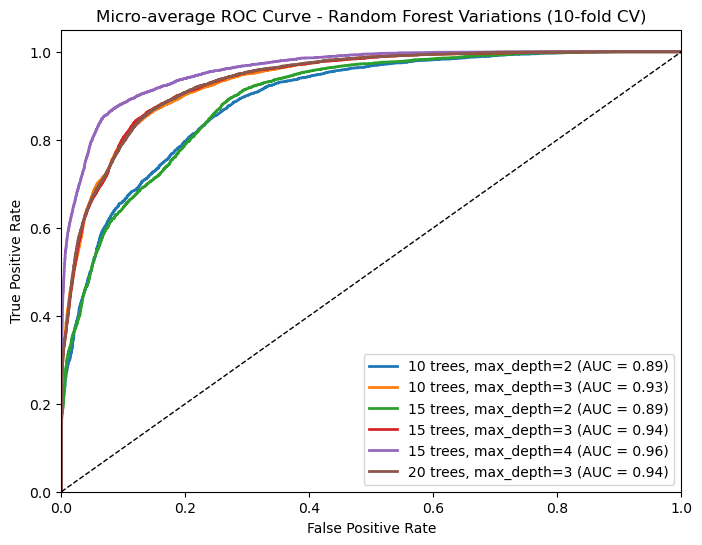

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Define features and target
X = df.drop('Brand', axis=1)
y = df['Brand']

rf_params = [
    {'n_estimators': 10, 'max_depth': 2, 'label': '10 trees, max_depth=2'},
    {'n_estimators': 10, 'max_depth': 3, 'label': '10 trees, max_depth=3'},
    {'n_estimators': 15, 'max_depth': 2, 'label': '15 trees, max_depth=2'},
    {'n_estimators': 15, 'max_depth': 3, 'label': '15 trees, max_depth=3'},
    {'n_estimators': 15, 'max_depth': 4, 'label': '15 trees, max_depth=4'},
    {'n_estimators': 20, 'max_depth': 3, 'label': '20 trees, max_depth=3'}
]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(8, 6))
for params in rf_params:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('minmax', MinMaxScaler()),
        ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=params['n_estimators'], max_depth=params['max_depth']))
    ])
    y_proba = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')
    classes = np.unique(y)
    y_bin = label_binarize(y, classes=classes)
    fpr, tpr, _ = roc_curve(y_bin.ravel(), y_proba.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{params['label']} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve - Random Forest Variations (10-fold CV)')
plt.legend(loc='lower right')

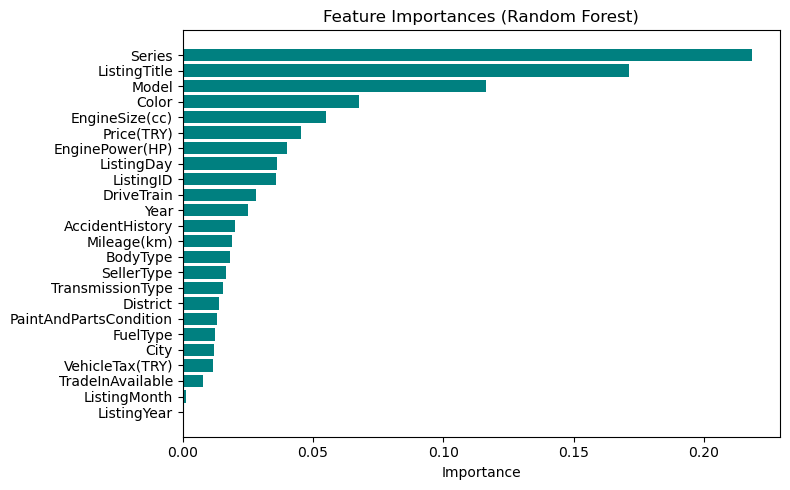

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])
pipeline.fit(X, y)
rf = pipeline.named_steps['rf']
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Plot feature importances
plt.figure(figsize=(8, 5))
names, scores = zip(*feat_imp)
plt.barh(names[::-1], scores[::-1], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()